### Подключение библиотек и загрузка данных

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn.utils import shuffle
from sklearn import cross_validation, linear_model, metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.grid_search import GridSearchCV 
%matplotlib inline

In [3]:
data = pd.read_csv('train.csv')

/root/miniconda/envs/rep_py2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
test = pd.read_csv('test.csv')

In [6]:
data.head()

startTime             region       brand      model  \
0  2016-07-01 00:00:43.000000  Рязанская область  Mitsubishi  Outlander   
1  2016-07-01 00:01:11.000000             Москва  ВАЗ (LADA)       2109   
2  2016-07-01 00:01:12.000000    Санкт-Петербург         УАЗ    Patriot   
3  2016-07-01 00:01:14.000000    Санкт-Петербург        Ford     Mondeo   
4  2016-07-01 00:01:42.000000   Тверская область         ГАЗ     ГАЗель   

   carcassType       color typeOfSteering yearOfCar engineType engineCapacity  \
0  Внедорожник       Белый          Левый      2014     Бензин            2.0   
1      Хетчбэк  Серебряный          Левый      2002     Бензин            1.5   
2  Внедорожник     Зелёный          Левый      2015     Бензин            2.7   
3        Седан       Серый          Левый      2005     Бензин            2.0   
4       Фургон       Белый          Левый      2005     Бензин            2.4   

  mileage driveType transmissionType  power ownersCount    price  
0   45000    Полный         Вариатор    150         NaN  1200000  
1  180000  Передний         Механика     78         NaN    58000  
2       1    Полный         Механика    128         NaN   499000  
3  160000  Передний          Автомат    146           2   249990  
4  100000    Задний         Механика    125         NaN   250000

In [5]:
test.head()

id                   startTime               region     brand  model  \
0   0  2016-12-01 00:00:33.000000  Саратовская область  Infiniti    G35   
1   1  2016-12-01 00:00:36.000000               Москва     Skoda   Yeti   
2   2  2016-12-01 00:00:52.000000     Тульская область   Peugeot    408   
3   3  2016-12-01 00:00:52.000000     Тверская область    Daewoo  Nexia   
4   4  2016-12-01 00:00:56.000000               Москва   Citroen     C4   

   carcassType       color typeOfSteering yearOfCar engineType engineCapacity  \
0        Седан     Бежевый          Левый      2008     Бензин            3.5   
1  Внедорожник  Серебряный          Левый      2014     Бензин            1.2   
2        Седан       Белый          Левый      2012     Бензин            1.6   
3        Седан  Серебряный          Левый      2012     Бензин            1.6   
4        Седан       Серый          Левый      2014     Бензин            1.6   

   mileage driveType transmissionType  power ownersCount  
0   145000    Полный          Автомат    316           3  
1    47630  Передний         Механика    102           1  
2    88000  Передний         Механика    113           1  
3    55766  Передний         Механика    109           1  
4    30591  Передний          Автомат    150           1

### Этап подготовки данных для анализа

##### Проверим есть ли у нас пропущенные значения в объектах признаков 

In [7]:
data.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2187260 entries, 0 to 2187259
Data columns (total 16 columns):
startTime           2187260 non-null object
region              2187260 non-null object
brand               2187260 non-null object
model               2184046 non-null object
carcassType         2187260 non-null object
color               2187260 non-null object
typeOfSteering      2187260 non-null object
yearOfCar           2187260 non-null object
engineType          2187260 non-null object
engineCapacity      2186678 non-null object
mileage             2187259 non-null object
driveType           2187260 non-null object
transmissionType    2187260 non-null object
power               2187259 non-null float64
ownersCount         1829641 non-null object
price               2187260 non-null float64
dtypes: float64(2), object(14)
memory usage: 283.7+ MB


In [8]:
data.isnull().sum()

startTime                0
region                   0
brand                    0
model                 3214
carcassType              0
color                    0
typeOfSteering           0
yearOfCar                0
engineType               0
engineCapacity         582
mileage                  1
driveType                0
transmissionType         0
power                    1
ownersCount         357619
price                    0
dtype: int64

In [7]:
test.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416023 entries, 0 to 416022
Data columns (total 16 columns):
id                  416023 non-null int64
startTime           416023 non-null object
region              416023 non-null object
brand               416023 non-null object
model               416023 non-null object
carcassType         416023 non-null object
color               416023 non-null object
typeOfSteering      416023 non-null object
yearOfCar           416023 non-null object
engineType          416023 non-null object
engineCapacity      416023 non-null object
mileage             416023 non-null int64
driveType           416023 non-null object
transmissionType    416023 non-null object
power               416023 non-null float64
ownersCount         416022 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 54.0+ MB


##### Для данных "test" у нас 1 пустое значение в признаке "ownersCount"
##### Для данных "data" необходимо заполнить пропуски в 5 признаках: model, engineCapacity, mileage, power,  ownersCount

In [11]:
test.ownersCount.unique()

array(['3', '1', '2', '4+', '0'], dtype=object)

##### Количество владельцев авто мы не знаем, поэтому заполним его нулем

In [5]:
test.ix[test.ownersCount.isnull(), 'ownersCount'] = '0'
data.ix[data.ownersCount.isnull(), 'ownersCount'] = '0'

##### Заполняем пропущенный признак model значением "Other"

In [6]:
data.ix[data.model.isnull(), 'model'] = 'Other'

##### Объем двигателя для пропущенных значений заполняем нулями, т.к в основном это электромобили

In [7]:
data.ix[data.engineCapacity.isnull(), 'engineCapacity'] ='0'

##### Пропущенным значением является автомобиль Huyndai, объем авто соответствующего года в среднем равен 97

In [9]:
data.ix[data.power.isnull(), 'power'] = 97.0

##### Пропущенное значение mileage заполнили средним значением пробега для авто с соответствующим годом

In [10]:
data.ix[data.mileage.isnull(), 'mileage'] = '40000'

In [18]:
data.isnull().sum()

startTime           0
region              0
brand               0
model               0
carcassType         0
color               0
typeOfSteering      0
yearOfCar           0
engineType          0
engineCapacity      0
mileage             0
driveType           0
transmissionType    0
power               0
ownersCount         0
price               0
dtype: int64

#### Преобразуем типы данных из object в float

##### В признаке объем двигателя "engineCapacity" присутсвует значение "6.0+", его мы преобразуем в  "6.0" и после проебразуем тип признака в float

In [19]:
test.engineCapacity.unique()

array(['3.5', '1.2', '1.6', '1.8', '2.0', '3.0', '1.4', '2.4', '1.5',
       '5.0', '2.2', '0.8', '1.7', '3.7', '2.3', '2.5', '2.7', '4.8',
       '3.8', '2.1', '4.7', '4.4', '4.5', '1.0', '2.8', '3.2', '1.3',
       '3.3', '0.6', '2.9', '4.2', '5.6', '4.0', '3.6', '0.7', '5.5',
       '1.9', '2.6', '3.4', '1.1', '6.0+', '4.6', '5.7', '4.3', '5.9',
       '5.4', '5.3', '3.1', '4.1', '6.0', '0.9', '5.8', '4.9', '5.2',
       '5.1', '3.9'], dtype=object)

In [20]:
test[test.engineCapacity == '6.0+'].shape

(519, 16)

In [15]:
data[data.engineCapacity == '6.0+'].shape

(4404, 16)

In [16]:
data[data.engineCapacity == '6.0+'].head()


startTime                region          brand  \
95    2016-07-01 00:30:49.000000                Москва        Bentley   
170   2016-07-01 01:04:29.000000                Москва          Lexus   
243   2016-07-01 02:07:57.000000  Чеченская республика  Mercedes-Benz   
423   2016-07-01 06:55:43.000000       Санкт-Петербург      Chevrolet   
1711  2016-07-01 11:25:08.000000                Москва       Cadillac   

             model  carcassType   color typeOfSteering yearOfCar engineType  \
95          Arnage        Седан  Чёрный          Левый      2005     Бензин   
170             LS        Седан  Чёрный          Левый      2008     Гибрид   
243   GL-класс AMG  Внедорожник  Чёрный          Левый      2014     Бензин   
423          Tahoe  Внедорожник   Белый          Левый      2016     Бензин   
1711      Escalade  Внедорожник  Чёрный          Левый      2008     Бензин   

     engineCapacity mileage driveType transmissionType  power ownersCount  \
95             6.0+   50000    Задний          Автомат    457          4+   
170            6.0+  140000    Полный          Автомат    397           1   
243            6.0+  130000    Полный          Автомат    558           0   
423            6.0+       1    Полный          Автомат    420           1   
1711           6.0+   75000    Полный          Автомат    409           1   

        price  
95    3500000  
170   1245000  
243   5200000  
423   3600000  
1711   670000

In [21]:
test[test.engineCapacity == '6.0+'].head()

id                   startTime              region       brand  \
2075  2075  2016-12-01 11:06:46.000000     Санкт-Петербург  ВАЗ (LADA)   
2863  2863  2016-12-01 12:09:20.000000              Москва    Cadillac   
3002  3002  2016-12-01 12:19:15.000000  Краснодарский край   Chevrolet   
3274  3274  2016-12-01 12:37:28.000000     Санкт-Петербург    Cadillac   
4501  4501  2016-12-01 14:01:44.000000           Татарстан  ВАЗ (LADA)   

            model  carcassType    color typeOfSteering yearOfCar engineType  \
2075  2115 Samara        Седан  Зелёный          Левый      2009     Бензин   
2863     Escalade  Внедорожник    Белый          Левый      2012     Бензин   
3002       Camaro         Купе    Белый          Левый      2012     Бензин   
3274     Escalade  Внедорожник  Красный          Левый      2008     Бензин   
4501       Priora        Седан    Серый          Левый      2014     Бензин   

     engineCapacity  mileage driveType transmissionType  power ownersCount  
2075           6.0+   150000  Передний         Механика     80           1  
2863           6.0+    73000    Полный          Автомат    409           1  
3002           6.0+    26000    Задний          Автомат    432           1  
3274           6.0+   148000    Полный          Автомат    409           2  
4501           6.0+    77000  Передний         Механика     97           1

In [11]:
data.ix[data.engineCapacity == '6.0+', 'engineCapacity'] = '6.0'
data.engineCapacity = data.engineCapacity.apply(float)
print data.engineCapacity.iloc[95], type(data.engineCapacity.iloc[95])

6.0 <type 'numpy.float64'>


In [12]:
test.ix[test.engineCapacity == '6.0+', 'engineCapacity'] = '6.0'
test.engineCapacity = test.engineCapacity.apply(float)
print test.engineCapacity.iloc[2075], type(test.engineCapacity.iloc[2075])

6.0 <type 'numpy.float64'>


##### Похожее преобразование сделаем и для года выпуска авто "yearOfCar" где присутствует значение "до 1960", его мы заменим на "1959"

In [25]:
test.yearOfCar.unique()

array(['2008', '2014', '2012', '2006', '2011', '2010', '2009', '1993',
       '2005', '2004', '2016', '2013', '1998', '2002', '2001', '1991',
       '1999', '2007', '2000', '1992', '1997', '2015', '2003', '1995',
       '1989', '1979', '1980', '1994', '1988', '1996', '1990', '1984',
       '1986', '1985', '1983', '1982', '1987', '1975', '1981',
       '\xd0\xb4\xd0\xbe 1960', '1976', '1974', '1965', '1962', '1973',
       '1960', '1968', '1978', '1961', '1977', '1964', '1970', '1972',
       '1969', '1966', '1967', '1971', '1963', '2017'], dtype=object)

In [26]:
test[test.yearOfCar == 'до 1960'].shape

(32, 16)

In [18]:
data[data.yearOfCar == 'до 1960'].shape

(1102, 16)

In [19]:
data[data.yearOfCar == 'до 1960'].head()

startTime                 region    brand        model  \
1536  2016-07-01 11:06:12.000000    Ставропольский край      ГАЗ  М-20 Победа   
3030  2016-07-01 13:56:09.000000   Чеченская республика  Москвич          400   
6501  2016-07-01 20:58:00.000000                 Москва  Москвич          401   
7257  2016-07-01 23:09:11.000000  Нижегородская область      ГАЗ     21 Волга   
8972  2016-07-02 11:28:29.000000     Пензенская область  Москвич          402   

     carcassType       color typeOfSteering yearOfCar engineType  \
1536     Хетчбэк     Бежевый          Левый   до 1960     Бензин   
3030     Хетчбэк     Зелёный          Левый   до 1960     Бензин   
6501     Хетчбэк  Серебряный          Левый   до 1960     Бензин   
7257       Седан     Бежевый          Левый   до 1960     Бензин   
8972       Седан     Бежевый          Левый   до 1960     Бензин   

      engineCapacity mileage driveType transmissionType  power ownersCount  \
1536             2.4   80000    Задний         Механика     75           0   
3030             1.6   35000    Задний         Механика    199           0   
6501             1.0    5000  Передний         Механика     50           1   
7257             2.4   50000    Задний         Механика     80           0   
8972             1.2   55000    Задний         Механика     35           0   

        price  
1536    40000  
3030   150000  
6501  1300000  
7257    17000  
8972    20000

In [27]:
test[test.yearOfCar == 'до 1960'].head()

id                   startTime                 region brand  \
6020    6020  2016-12-01 15:30:17.000000      Самарская область   ГАЗ   
7704    7704  2016-12-01 17:28:16.000000              Ингушетия   ГАЗ   
25837  25837  2016-12-03 12:23:33.000000                   Крым   ГАЗ   
52651  52651  2016-12-05 18:54:06.000000  Нижегородская область   ГАЗ   
52718  52718  2016-12-05 19:00:04.000000  Нижегородская область   ГАЗ   

             model  carcassType       color typeOfSteering yearOfCar  \
6020            69  Внедорожник     Зелёный          Левый   до 1960   
7704        Другая  Внедорожник     Зелёный          Левый   до 1960   
25837     21 Волга        Седан       Серый          Левый   до 1960   
52651  М-20 Победа      Хетчбэк  Коричневый          Левый   до 1960   
52718  М-20 Победа      Хетчбэк  Коричневый          Левый   до 1960   

      engineType  engineCapacity  mileage driveType transmissionType  power  \
6020      Бензин             2.0    10000    Полный         Механика     90   
7704      Бензин             2.0      100    Полный         Механика    100   
25837     Бензин             2.5    90000    Задний         Механика     70   
52651     Бензин             2.0    20000    Задний         Механика     52   
52718     Бензин             1.5    20000    Задний         Механика     52   

      ownersCount  
6020            2  
7704            1  
25837           1  
52651           3  
52718           3

In [13]:
data.ix[data.yearOfCar == 'до 1960', 'yearOfCar'] = '1959'
data.yearOfCar = data.yearOfCar.apply(int)
print data.yearOfCar.iloc[1536], type(data.yearOfCar.iloc[1536])

1959 <type 'numpy.int64'>


In [14]:
test.ix[test.yearOfCar == 'до 1960', 'yearOfCar'] = '1959'
test.yearOfCar = test.yearOfCar.apply(int)
print test.yearOfCar.iloc[6020], type(test.yearOfCar.iloc[6020])

1959 <type 'numpy.int64'>


##### Некоторые владельцы ввели диапазон пробега, его мы заменим на нижнюю границу диапазона

In [15]:
data.mileage = data.mileage.apply(str)
for i, capacity in enumerate(data['mileage']):
    if '-' in capacity:
        data['mileage'].iloc[i] = capacity.split(' - ')[0].split(' ')[0] + '000'
        print 'выбрали из {} наименьшее {} '.format(capacity, data['mileage'].iloc[i])
        
data.mileage = data.mileage.apply(float)

выбрали из 70 000 - 74 999 наименьшее 70000 
выбрали из 95 000 - 99 999 наименьшее 95000 
выбрали из 65 000 - 69 999 наименьшее 65000 
выбрали из 200 000 - 209 999 наименьшее 200000 
выбрали из 110 000 - 119 999 наименьшее 110000 
выбрали из 80 000 - 84 999 наименьшее 80000 
выбрали из 80 000 - 84 999 наименьшее 80000 
выбрали из 100 000 - 109 999 наименьшее 100000 
выбрали из 100 000 - 109 999 наименьшее 100000 
выбрали из 120 000 - 129 999 наименьшее 120000 
выбрали из 100 000 - 109 999 наименьшее 100000 
выбрали из 60 000 - 64 999 наименьшее 60000 
выбрали из 180 000 - 189 999 наименьшее 180000 
выбрали из 85 000 - 89 999 наименьшее 85000 
выбрали из 90 000 - 94 999 наименьшее 90000 
выбрали из 160 000 - 169 999 наименьшее 160000 
выбрали из 130 000 - 139 999 наименьшее 130000 
выбрали из 60 000 - 64 999 наименьшее 60000 
выбрали из 130 000 - 139 999 наименьшее 130000 
выбрали из 240 000 - 249 999 наименьшее 240000 
выбрали из 40 000 - 44 999 наименьшее 40000 


/root/miniconda/envs/rep_py2/lib/python2.7/site-packages/pandas/core/indexing.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [114]:
data.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2187260 entries, 0 to 2187259
Data columns (total 16 columns):
startTime           2187260 non-null object
region              2187260 non-null object
brand               2187260 non-null object
model               2187260 non-null object
carcassType         2187260 non-null object
color               2187260 non-null object
typeOfSteering      2187260 non-null object
yearOfCar           2187260 non-null int64
engineType          2187260 non-null object
engineCapacity      2187260 non-null float64
mileage             2187260 non-null float64
driveType           2187260 non-null object
transmissionType    2187260 non-null object
power               2187260 non-null float64
ownersCount         2187260 non-null object
price               2187260 non-null float64
dtypes: float64(4), int64(1), object(11)
memory usage: 283.7+ MB


In [115]:
test.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416023 entries, 0 to 416022
Data columns (total 16 columns):
id                  416023 non-null int64
startTime           416023 non-null object
region              416023 non-null object
brand               416023 non-null object
model               416023 non-null object
carcassType         416023 non-null object
color               416023 non-null object
typeOfSteering      416023 non-null object
yearOfCar           416023 non-null int64
engineType          416023 non-null object
engineCapacity      416023 non-null float64
mileage             416023 non-null int64
driveType           416023 non-null object
transmissionType    416023 non-null object
power               416023 non-null float64
ownersCount         416023 non-null object
dtypes: float64(2), int64(3), object(11)
memory usage: 54.0+ MB


##### Количество объявлений у которых цена указана 0

In [33]:
data.ix[data.price == 0, 'price'].count()

38707

#### В данных есть много выбросов по цене, что может сказаться на качестве модели, поэтому часть нужно отсечь. На данном этапе нужно сделать выбор, что нам важнее: качественно оценивать цену для недорогих автомобилей или  хорошо оценивать все модели но менее качественно. 
#### Я выбрал первый вариант, так как недорогих (цена < 4 млн) авто составляет 99.8%. Также надо учитывать, что модель плохо обучится на дорогих авто и при тестировании мы получим плохую оценку на дорогих авто, будут выбросы. Метрика оценкой качестве взяли mape (mean absolute percentage error) и выбросы на нее будут сильно влиять

In [118]:
data.ix[data.price > 4000000, 'price'].count()

5178

In [121]:
data.ix[data.price > 4000000, 'price'].count()*100.0/len(data)

0.23673454459003501

In [122]:
data[data.price > 4000000]

startTime                 region          brand  \
243      2016-07-01 02:07:57.000000   Чеченская республика  Mercedes-Benz   
895      2016-07-01 09:25:37.000000                 Москва        Porsche   
1363     2016-07-01 10:44:11.000000       Липецкая область  Mercedes-Benz   
1558     2016-07-01 11:08:36.000000                 Москва  Mercedes-Benz   
1799     2016-07-01 11:33:26.000000      Калужская область  Mercedes-Benz   
1825     2016-07-01 11:36:46.000000        Санкт-Петербург            BMW   
1845     2016-07-01 11:38:35.000000    Ханты-Мансийский АО     Land Rover   
2164     2016-07-01 12:16:17.000000        Санкт-Петербург            BMW   
2390     2016-07-01 12:43:08.000000        Санкт-Петербург        Ferrari   
2838     2016-07-01 13:32:59.000000        Санкт-Петербург        Ferrari   
2879     2016-07-01 13:37:18.000000                 Москва  Mercedes-Benz   
3060     2016-07-01 13:59:48.000000        Санкт-Петербург        Porsche   
3061     2016-07-01 13:59:48.000000        Санкт-Петербург        Porsche   
3094     2016-07-01 14:02:50.000000    Ставропольский край  Mercedes-Benz   
3671     2016-07-01 15:01:29.000000        Санкт-Петербург        Porsche   
3676     2016-07-01 15:01:58.000000    Ярославская область          Lexus   
3713     2016-07-01 15:05:29.000000                 Москва  Mercedes-Benz   
3869     2016-07-01 15:23:22.000000                 Москва  Mercedes-Benz   
3881     2016-07-01 15:25:42.000000   Чеченская республика  Mercedes-Benz   
3964     2016-07-01 15:35:37.000000        Санкт-Петербург  Mercedes-Benz   
4365     2016-07-01 16:30:52.000000    Воронежская область            BMW   
4399     2016-07-01 16:35:10.000000    Воронежская область            BMW   
5442     2016-07-01 18:40:58.000000    Ставропольский край     Land Rover   
6857     2016-07-01 21:54:40.000000          Пермский край       Cadillac   
7557     2016-07-02 00:56:16.000000                 Москва  Mercedes-Benz   
8176     2016-07-02 09:17:02.000000        Санкт-Петербург     Land Rover   
9038     2016-07-02 11:37:50.000000        Санкт-Петербург            BMW   
9986     2016-07-02 13:38:38.000000                 Москва         Toyota   
10104    2016-07-02 13:53:00.000000                 Москва        Bentley   
10126    2016-07-02 13:55:45.000000                 Москва        Bentley   
...                             ...                    ...            ...   
2175433  2016-11-30 09:54:12.000000          Пермский край            BMW   
2178412  2016-11-30 13:21:49.000000           Башкортостан  Mercedes-Benz   
2178479  2016-11-30 13:26:05.000000        Санкт-Петербург  Mercedes-Benz   
2178842  2016-11-30 13:47:23.000000                 Москва        Bentley   
2178898  2016-11-30 13:50:05.000000                 Москва        Bentley   
2178948  2016-11-30 13:52:47.000000                 Москва        Bentley   
2179077  2016-11-30 14:01:03.000000                 Москва        Bentley   
2179108  2016-11-30 14:03:07.000000                 Москва        Bentley   
2179146  2016-11-30 14:04:49.000000        Санкт-Петербург  Mercedes-Benz   
2179156  2016-11-30 14:05:33.000000                 Москва        Bentley   
2179178  2016-11-30 14:07:14.000000                 Москва  Mercedes-Benz   
2180782  2016-11-30 15:48:53.000000        Санкт-Петербург  Mercedes-Benz   
2181652  2016-11-30 16:38:46.000000           Башкортостан            BMW   
2181782  2016-11-30 16:47:15.000000    Ярославская область     Land Rover   
2182035  2016-11-30 17:03:00.000000                 Москва  Mercedes-Benz   
2182080  2016-11-30 17:05:55.000000        Санкт-Петербург  Mercedes-Benz   
2182524  2016-11-30 17:36:34.000000        Санкт-Петербург  Mercedes-Benz   
2183189  2016-11-30 18:18:32.000000     Ростовская область  Mercedes-Benz   
2183326  2016-11-30 18:28:32.000000                 Москва  Mercedes-Benz   
2183329  2016-11-30 18:28:32.000000                 Москва  Mercedes-Benz   
2183331  2016-11-30 18

In [24]:
data[data.price == 0]

startTime                 region          brand  \
139      2016-07-01 00:51:45.000000   Белгородская область     Volkswagen   
189      2016-07-01 01:17:45.000000        Санкт-Петербург          Mazda   
244      2016-07-01 02:10:26.000000     Краснодарский край     ВАЗ (LADA)   
368      2016-07-01 06:00:56.000000    Ульяновская область        Hyundai   
377      2016-07-01 06:10:51.000000        Томская область         Toyota   
441      2016-07-01 07:16:06.000000    Ставропольский край           Ford   
450      2016-07-01 07:18:30.000000           Башкортостан     ВАЗ (LADA)   
482      2016-07-01 07:39:21.000000    Ставропольский край           Ford   
511      2016-07-01 07:53:50.000000      Самарская область          Skoda   
557      2016-07-01 08:14:34.000000      Самарская область           Audi   
573      2016-07-01 08:19:49.000000           Башкортостан         Daewoo   
582      2016-07-01 08:21:45.000000      Красноярский край     ВАЗ (LADA)   
621      2016-07-01 08:29:35.000000              Татарстан          LIFAN   
660      2016-07-01 08:42:31.000000      Ямало-Ненецкий АО            KIA   
748      2016-07-01 09:02:44.000000          Пермский край           Ford   
819      2016-07-01 09:12:22.000000    Челябинская область     ВАЗ (LADA)   
836      2016-07-01 09:15:23.000000    Челябинская область          Skoda   
900      2016-07-01 09:26:52.000000     Краснодарский край          Geely   
994      2016-07-01 09:43:53.000000              Татарстан            ГАЗ   
1017     2016-07-01 09:47:57.000000               Марий Эл        Renault   
1035     2016-07-01 09:50:33.000000       Тульская область     ВАЗ (LADA)   
1040     2016-07-01 09:51:48.000000              Татарстан     ВАЗ (LADA)   
1056     2016-07-01 09:54:09.000000  Волгоградская область            УАЗ   
1059     2016-07-01 09:54:15.000000      Калужская область        Hyundai   
1078     2016-07-01 09:58:26.000000                 Москва            KIA   
1118     2016-07-01 10:03:40.000000    Воронежская область         Suzuki   
1168     2016-07-01 10:14:10.000000               Дагестан     ВАЗ (LADA)   
1195     2016-07-01 10:17:17.000000     Ростовская область           ЛуАЗ   
1252     2016-07-01 10:27:22.000000    Ярославская область  Mercedes-Benz   
1348     2016-07-01 10:42:19.000000   Астраханская область     Mitsubishi   
...                             ...                    ...            ...   
2186172  2016-11-30 21:53:56.000000              Татарстан     ВАЗ (LADA)   
2186336  2016-11-30 22:09:02.000000     Ростовская область         Suzuki   
2186382  2016-11-30 22:11:01.000000                 Москва        Renault   
2186405  2016-11-30 22:11:56.000000     Краснодарский край     ВАЗ (LADA)   
2186451  2016-11-30 22:15:56.000000       Брянская область  Mercedes-Benz   
2186452  2016-11-30 22:15:57.000000     Московская область            УАЗ   
2186465  2016-11-30 22:17:02.000000                Карелия     Volkswagen   
2186530  2016-11-30 22:24:17.000000        Санкт-Петербург          Mazda   
2186557  2016-11-30 22:26:17.000000     Краснодарский край            ГАЗ   
2186610  2016-11-30 22:30:40.000000     Смоленская область     ВАЗ (LADA)   
2186612  2016-11-30 22:30:56.000000     Московская область            УАЗ   
2186673  2016-11-30 22:37:37.000000              Татарстан             ИЖ   
2186694  2016-11-30 22:39:26.000000    Костромская область         Toyota   
2186736  2016-11-30 22:44:20.000000               Дагестан        Hyundai   
2186759  2016-11-30 22:46:56.000000     Кабардино-Балкария     ВАЗ (LADA)   
2186800  2016-11-30 22:52:03.000000     Краснодарский край     ВАЗ (LADA)   
2186816  2016-11-30 22:54:01.000000   Чеченская республика     ВАЗ (LADA)   
2186841  2016-11-30 22:57:03.000000     Московская область     Volkswagen   
2186848  2016-11-30 22:58:00.000000   Новгородская область     ВАЗ (LADA)   
2186960  2016-11-30 23:12:14.000000       Тульская область     ВАЗ (LADA)   
2186964  2016-11-30 23

##### Мы оставляем автомобили с ценой выше 30 и ниже 4 млн. 

In [16]:
data = data[(data.price > 30) & (data.price < 4000000)  ]

In [17]:
data[data.price == 0]

Empty DataFrame
Columns: [startTime, region, brand, model, carcassType, color, typeOfSteering, yearOfCar, engineType, engineCapacity, mileage, driveType, transmissionType, power, ownersCount, price]
Index: []

In [18]:
data[data.price > 4000000]

Empty DataFrame
Columns: [startTime, region, brand, model, carcassType, color, typeOfSteering, yearOfCar, engineType, engineCapacity, mileage, driveType, transmissionType, power, ownersCount, price]
Index: []

##### Я предполагаю, что пользователь, который указал цену ниже 1000 имел в виду цену в тысячах рублях

In [19]:
data.ix[(data.price < 1000), 'price'] = data.price[(data.price < 1000)] * 1000

##### Я предполагаю, что пользователь, который указал цену от 1000 до 2000  имел в виду цену в тысячах рублях, но при условии что год выпуска не ниже 2010 и объем двигателя не меньше 2.0

In [20]:
data.ix[(data.price >= 1000) & (data.price <= 2000) & (data.yearOfCar >= 2010) & (data.engineCapacity >= 2.0), 'price'] = data.price[(data.price >= 1000) & (data.price <= 2000) & (data.yearOfCar >= 2010) & (data.engineCapacity >= 2.0)] * 1000

##### Я предполагаю, что пользователь, который указал цену от 2000 до 3000  имел в виду цену в тысячах рублях, но при условии что  объем двигателя не меньше 2.5

In [21]:
data.ix[(data.price > 2000) & (data.price <= 3000) &  (data.engineCapacity >= 2.5), 'price'] = data.price[(data.price > 2000) & (data.price <= 3000) & (data.engineCapacity >= 2.5)] *1000

##### Было предположение, что пользователи указывали цены в долларах или евро, но таких авто было мало, и я решил их удалить из данных

In [22]:
data = data.drop(data[(data.price >= 1000) & (data.price <= 10000)].index)

In [23]:
data = data.drop(data[(data.price > 10000) & (data.price <= 20000) &  (data.yearOfCar >= 2000)].index)

##### Приведем 2 таблицы к одинаковым признакам: удалим "id" из тестовых данных и добавим "price" заполненный нулями

In [21]:
data.shape 

(2129956, 16)

In [22]:
test.shape

(416023, 16)

In [24]:
del test['id']

In [25]:
test['price'] = 0

In [71]:
test.head()

startTime               region     brand  model  \
0  2016-12-01 00:00:33.000000  Саратовская область  Infiniti    G35   
1  2016-12-01 00:00:36.000000               Москва     Skoda   Yeti   
2  2016-12-01 00:00:52.000000     Тульская область   Peugeot    408   
3  2016-12-01 00:00:52.000000     Тверская область    Daewoo  Nexia   
4  2016-12-01 00:00:56.000000               Москва   Citroen     C4   

   carcassType       color typeOfSteering  yearOfCar engineType  \
0        Седан     Бежевый          Левый       2008     Бензин   
1  Внедорожник  Серебряный          Левый       2014     Бензин   
2        Седан       Белый          Левый       2012     Бензин   
3        Седан  Серебряный          Левый       2012     Бензин   
4        Седан       Серый          Левый       2014     Бензин   

   engineCapacity  mileage driveType transmissionType  power ownersCount  \
0             3.5   145000    Полный          Автомат    316           3   
1             1.2    47630  Передний         Механика    102           1   
2             1.6    88000  Передний         Механика    113           1   
3             1.6    55766  Передний         Механика    109           1   
4             1.6    30591  Передний          Автомат    150           1   

   price  
0      0  
1      0  
2      0  
3      0  
4      0

##### Перемешаем данные и присоединим к ним тестовые данные.

In [26]:
data = shuffle(data, random_state=123)
data.head()

startTime               region       brand   model  \
449945   2016-08-06 10:50:57.000000    Самарская область  ВАЗ (LADA)  Granta   
1682766  2016-10-26 16:25:42.000000    Самарская область   Chevrolet    Niva   
1452315  2016-10-11 20:31:13.000000   Ростовская область       Volvo     S60   
1959205  2016-11-14 16:44:51.000000  Воронежская область  Volkswagen   Jetta   
1746595  2016-10-30 20:22:45.000000      Санкт-Петербург       Mazda    CX-5   

         carcassType       color typeOfSteering  yearOfCar engineType  \
449945         Седан  Серебряный          Левый       2015     Бензин   
1682766  Внедорожник  Серебряный          Левый       2014     Бензин   
1452315        Седан  Фиолетовый          Левый       2007     Бензин   
1959205        Седан       Белый          Левый       2010     Бензин   
1746595  Внедорожник       Белый          Левый       2012     Бензин   

         engineCapacity  mileage driveType transmissionType  power  \
449945              1.6    15000  Передний         Механика     87   
1682766             1.7    29000    Полный         Механика     80   
1452315             2.4   210000  Передний          Автомат    170   
1959205             1.6    59000  Передний          Автомат    103   
1746595             2.0   100000    Полный          Автомат    150   

        ownersCount   price  
449945            1  310000  
1682766           1  470000  
1452315           2  410000  
1959205           2  495000  
1746595           1  999000

In [28]:
print data.shape, test.shape

(2129956, 16) (416023, 16)


In [29]:
data = pd.concat([data, test])

In [30]:
data.shape

(2545979, 16)

In [31]:
data.iloc[2129954:2129958]

startTime               region       brand    model  \
286513  2016-07-26 13:55:43.000000   Московская область  ВАЗ (LADA)     2107   
796634  2016-08-29 21:43:03.000000         Башкортостан   Chevrolet  Lacetti   
0       2016-12-01 00:00:33.000000  Саратовская область    Infiniti      G35   
1       2016-12-01 00:00:36.000000               Москва       Skoda     Yeti   

        carcassType       color typeOfSteering  yearOfCar engineType  \
286513        Седан     Красный          Левый       2005     Бензин   
796634        Седан  Серебряный          Левый       2010     Бензин   
0             Седан     Бежевый          Левый       2008     Бензин   
1       Внедорожник  Серебряный          Левый       2014     Бензин   

        engineCapacity  mileage driveType transmissionType  power ownersCount  \
286513             1.6   140000    Задний         Механика    104           0   
796634             1.4    75000  Передний         Механика     97           2   
0                  3.5   145000    Полный          Автомат    316           3   
1                  1.2    47630  Передний         Механика    102           1   

         price  
286513   30000  
796634  310000  
0            0  
1            0

##### Из данных я решил удалить некоторые признаки, которые по логике не могут  или не сильно влияют  на цену авто. Также я удаляю признак "brand" так как по модели "model" можно однозначно определить "brand" авто.

In [34]:
del data['startTime']
del data['region']
del data['brand']
del data['color']

##### Приведем количественные переменные, чтобы модели было легче обучаться и коэффициенты при переменных были одного порядка. 
##### Пробег я разделил на 10 000, мощность на 100, а с года выпуска я  вычел 2000. 

In [36]:
data['mileage'] = data['mileage']/10000

In [38]:
data['power'] = data['power']/100.0

In [40]:
data['yearOfCar'] = data['yearOfCar']-2000

In [41]:
data.iloc[2129954:2129958]

model  carcassType typeOfSteering  yearOfCar engineType  \
286513     2107        Седан          Левый          5     Бензин   
796634  Lacetti        Седан          Левый         10     Бензин   
0           G35        Седан          Левый          8     Бензин   
1          Yeti  Внедорожник          Левый         14     Бензин   

        engineCapacity  mileage driveType transmissionType  power ownersCount  \
286513             1.6   14.000    Задний         Механика   1.04           0   
796634             1.4    7.500  Передний         Механика   0.97           2   
0                  3.5   14.500    Полный          Автомат   3.16           3   
1                  1.2    4.763  Передний         Механика   1.02           1   

         price  
286513   30000  
796634  310000  
0            0  
1            0

##### Разделим данные на признаки и целевую переменную

In [43]:
columns = data.columns[0:-1]
columns

Index([u'model', u'carcassType', u'typeOfSteering', u'yearOfCar',
       u'engineType', u'engineCapacity', u'mileage', u'driveType',
       u'transmissionType', u'power', u'ownersCount'],
      dtype='object')

In [44]:
data.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2545979 entries, 449945 to 416022
Data columns (total 12 columns):
model               2545979 non-null object
carcassType         2545979 non-null object
typeOfSteering      2545979 non-null object
yearOfCar           2545979 non-null int64
engineType          2545979 non-null object
engineCapacity      2545979 non-null float64
mileage             2545979 non-null float64
driveType           2545979 non-null object
transmissionType    2545979 non-null object
power               2545979 non-null float64
ownersCount         2545979 non-null object
price               2545979 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 252.5+ MB


In [45]:
# Целевая переменная
y = data.values[:,-1]

In [46]:
# Данные без целевого признака
data = data[columns].values

##### Модели не могут принять в качестве признаков качественные переменные, поэтому их нужно преобразовать. Для этого я сначала применяю LabelEncoder, чтобы каждому уникальному значению признака соответствовало число, а затем OneHotEncoder, чтобы соответствующее число стало признаком и принимало значение 0 либо 1.

##### Количество признаков резко увеличилось и появилось много нулей в этих признаках, чтобы сохранить память, данные мы будет хранить в виде sparse

In [51]:
to_label = [0,1,2,4,5,7,8,10]
label_encoder=LabelEncoder()
for i in to_label:
    data[:,i] = label_encoder.fit_transform(data[:,i])



In [52]:
data[2]

array([1336, 8, 0, 7, 0, 19, 21.0, 1, 0, 1.7, 2], dtype=object)

In [53]:
enc = OneHotEncoder(categorical_features=[0,1,2,4,5,7,8,10])

data = enc.fit_transform(data).tocsr()

##### Отделим данные и тестовые данные

In [54]:
indexes1 = np.where(y == 0)[0]
indexes2 = np.where(y > 0)[0]


X_final = data[indexes1]
data = data[indexes2]
y_final = y[indexes1]
y = y[indexes2]

In [55]:
len(y_final)

416023

In [38]:
data

<2129956x2029 sparse matrix of type '<type 'numpy.float64'>'
	with 29818932 stored elements in Compressed Sparse Row format>

##### При обучении модели в идеале нужно использовать кросс-валидацию, но так как у нас много данных у меня не хватает памяти на кросс-валидацию. Я выделяю 20% на тестовую выборку для проверки качестве по метрике "mape"

In [56]:
data, data_test, y, y_test = cross_validation.train_test_split(data, y, test_size = 0.2)

In [57]:
data

<1703964x1840 sparse matrix of type '<type 'numpy.float64'>'
	with 18699638 stored elements in Compressed Sparse Row format>

In [50]:
# S.toarray()

In [41]:
data_test

<425992x2029 sparse matrix of type '<type 'numpy.float64'>'
	with 5963796 stored elements in Compressed Sparse Row format>

##### Метрика для оценки качества "mean absolute percentage error"

In [58]:
def mape(actual, predicted):
    return 100*np.mean(np.abs((actual-predicted)/actual))

In [59]:
# стандартизация данных
data = scale(data, with_mean=False)
data_test = scale(data_test, with_mean=False)

In [44]:
data

<1703964x2029 sparse matrix of type '<type 'numpy.float64'>'
	with 23855136 stored elements in Compressed Sparse Column format>

### Этап применения моделей

### LinearRegression

In [62]:
regressor = LinearRegression()
regressor.fit(data, y)
reg_predictions2 = regressor.predict(data_test)

##### Качество предсказания 71% на тестовой выборке

In [63]:
mape(y_test, reg_predictions2)

71.21194122913026

In [64]:
reg_predictions2[0]

495741.71654328192

In [65]:
test_labels[0]

280000.0

##### Построим гистограмму

(array([ 31262.,  30197.,  28964.,  27032.,  24838.,  22246.,  19839.,
         17988.,  16310.,  14363.,  12654.,  11344.,  10252.,   9141.,
          8177.,   7455.,   6624.,   6024.,   5447.,   4950.,   4648.,
          4266.,   3958.,   3658.,   3519.,   3210.,   3007.,   2829.,
          2673.,   2485.,   2432.,   2227.,   2093.,   1963.,   1912.,
          1742.,   1676.,   1640.,   1609.,   1479.,   1418.,   1355.,
          1245.,   1302.,   1201.,   1220.,   1077.,   1049.,    979.,
          1013.,    963.,    929.,    887.,    894.,    811.,    858.,
           770.,    764.,    738.,    693.,    655.,    664.,    628.,
           642.,    556.,    578.,    572.,    567.,    541.,    574.,
           509.,    476.,    483.,    464.,    503.,    441.,    466.,
           412.,    449.,    415.,    429.,    396.,    386.,    363.,
           385.,    342.,    338.,    344.,    324.,    322.,    308.,
           268.,    338.,    309.,    285.,    281.,    291.,    261.,
      

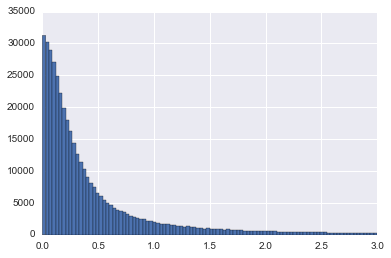

In [69]:
plt.hist((np.abs(y_test - reg_predictions2))/y_test, range = (0,3), bins = 100)

##### Видим, что модель неплохо  предсказывает цену, но из-за выбросов метрика качества дает не лучший результат

##### Применим линейную модель с регуляризацией L1 Lasso и L2 Ridge regression чтобы решить проблему мультиколлинеарности и неинформативных признаков

##### Модель Lasso поможет нам выбросить признаки, обнуляет веса при некоторых признаках. К сожалению, данная модель у меня работала очень долго и пришлось обойтись без нее. Может быть это связано с тем, что данные хранятся в sparse

### Ridge - линейная модель с регуляризацией L2

In [73]:
regressor = Ridge(alpha = 5)
regressor.fit(data, y)
reg_predictions4 = regressor.predict(data_test)

##### Видим, что качество улучшилось)

In [74]:
mape(y_test, reg_predictions4)

65.24194598487455

In [75]:
mape_list1 = []
mape_list2 = []

for i in range(len(y_test)):
    a = (np.abs(y_test[i] - reg_predictions4[i]))/y_test[i]
    
    if a > 1:
        mape_list1.append(a)
        print i, a, y_test[i] , reg_predictions4[i]
    else:
        mape_list2.append(a)

1 3.43288957609 17000.0 -41359.1227934
4 5.82685944537 40000.0 273074.377815
13 3.91320483323 200000.0 982640.966646
21 1.266207236 45000.0 101979.32562
22 3.43768083265 35000.0 155318.829143
30 1.00675541465 330000.0 662229.286836
40 3.01262922632 80000.0 321010.338106
45 2.26314911282 45000.0 -56841.7100771
50 1.09132954596 60000.0 125479.772757
55 1.11200444736 130000.0 274560.578156
60 1.324466773 74500.0 173172.774589
61 1.12642398434 36000.0 76551.2634361
68 1.55582146964 155000.0 396152.327794
69 1.13254530179 52000.0 110892.355693
84 1.07166147866 69000.0 142944.642028
85 1.95436883831 57000.0 -54399.0237839
87 1.17190276233 100000.0 -17190.2762331
90 1.18601892818 250000.0 546504.732044
99 1.17832296403 48000.0 104559.502273
105 2.12559481394 70000.0 -78791.6369755
107 3.29075272231 53000.0 227409.894282
108 1.27068718547 35000.0 -9474.05149136
110 2.14436686439 25000.0 -28609.1716098
112 1.52496733757 120000.0 302996.080508
117 1.74518374054 15000.0 -11177.756108
124 1.549150

##### Построим гистограмму

(array([ 27554.,  27321.,  26747.,  25843.,  24143.,  22612.,  20897.,
         19230.,  17728.,  15819.,  13976.,  12745.,  11089.,   9996.,
          8947.,   7995.,   7094.,   6279.,   5833.,   5224.,   4699.,
          4365.,   3882.,   3646.,   3586.,   3235.,   2973.,   2851.,
          2689.,   2460.,   2467.,   2265.,   2050.,   1957.,   2010.,
          1859.,   1731.,   1672.,   1524.,   1482.,   1466.,   1427.,
          1339.,   1306.,   1206.,   1174.,   1112.,   1115.,   1050.,
          1102.,   1013.,   1007.,    945.,    874.,    882.,    839.,
           853.,    766.,    747.,    794.,    698.,    684.,    678.,
           702.,    674.,    581.,    631.,    571.,    571.,    553.,
           510.,    536.,    502.,    452.,    484.,    450.,    464.,
           426.,    415.,    384.,    402.,    412.,    369.,    380.,
           387.,    363.,    365.,    329.,    309.,    320.,    323.,
           307.,    279.,    288.,    267.,    278.,    300.,    257.,
      

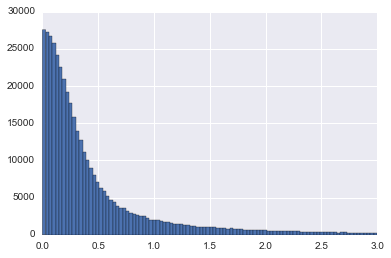

In [76]:
plt.hist((np.abs(y_test - reg_predictions4))/y_test, range = (0,3), bins = 100)

##### Немного статистики

In [78]:
np.mean(mape_list2)

0.28052264057832826

In [79]:
np.median(mape_list2)

0.21637480792134225

In [80]:
len(mape_list2)

358881

In [81]:
len(mape_list1)

65888

##### Попробуем увеличить коэффициент для ridge regression

### Ridge penalty = 50

In [83]:
regressor = Ridge(alpha = 50)
regressor.fit(data, y)
reg_predictions5 = regressor.predict(data_test)

##### Качество почти не изменилось

In [84]:
mape(y_test, reg_predictions5)

65.2601741397092

##### Построим гистограмму и убедимся, что ничего не поменялось

(array([ 27531.,  27306.,  26778.,  25820.,  24139.,  22620.,  20899.,
         19212.,  17748.,  15824.,  13964.,  12752.,  11093.,   9992.,
          8940.,   7995.,   7103.,   6288.,   5826.,   5216.,   4722.,
          4347.,   3892.,   3625.,   3598.,   3228.,   2969.,   2872.,
          2696.,   2454.,   2458.,   2263.,   2043.,   1961.,   2018.,
          1871.,   1716.,   1676.,   1515.,   1483.,   1470.,   1418.,
          1353.,   1294.,   1205.,   1181.,   1123.,   1105.,   1056.,
          1104.,   1012.,    998.,    947.,    868.,    887.,    836.,
           868.,    747.,    760.,    784.,    701.,    694.,    676.,
           698.,    674.,    583.,    638.,    572.,    568.,    557.,
           505.,    536.,    487.,    468.,    481.,    456.,    460.,
           423.,    422.,    389.,    397.,    410.,    363.,    382.,
           391.,    360.,    366.,    325.,    315.,    321.,    320.,
           307.,    280.,    293.,    259.,    284.,    299.,    253.,
      

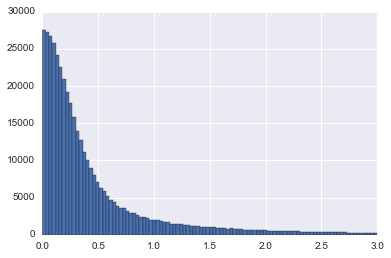

In [85]:
plt.hist((np.abs(y_test - reg_predictions5))/y_test, range = (0,3), bins = 100)

### Lasso - работает слишком долго ((

In [86]:
# regressor = Lasso(alpha = 0.1)
# regressor.fit(S_train_linear, train_labels)
# reg_predictions3 = regressor.predict(S_test_linear)

In [87]:
# mape(test_labels, reg_predictions3)

In [88]:
# reg_predictions3[0]

In [89]:
# test_labels[0]

### Random Forest

In [90]:
regressor = RandomForestRegressor(n_estimators = 15, max_depth=20, n_jobs=-1)
regressor.fit(data, y)  
reg_predictions3 = regressor.predict(data_test)

##### Видим, что качество резко улучшилось:  41%

In [171]:
mape(y_test, reg_predictions3)

41.2679564936


##### Проверим рандомно на сколько хорошо предсказывает

In [92]:
reg_predictions3[2]

345827.0459089622

In [93]:
y_test[2]
# 205000.0

699000.0

In [94]:
zip(np.floor(reg_predictions3),y_test)

[(230953.0, 280000.0),
 (37128.0, 17000.0),
 (345827.0, 699000.0),
 (85200.0, 180000.0),
 (102109.0, 40000.0),
 (278996.0, 360000.0),
 (482246.0, 590000.0),
 (90371.0, 165000.0),
 (91169.0, 151000.0),
 (48589.0, 65000.0),
 (419456.0, 325000.0),
 (312222.0, 427000.0),
 (270791.0, 230000.0),
 (315309.0, 200000.0),
 (118056.0, 115000.0),
 (329874.0, 365000.0),
 (506154.0, 850000.0),
 (116029.0, 137000.0),
 (72996.0, 110000.0),
 (260056.0, 325000.0),
 (108911.0, 123000.0),
 (38761.0, 45000.0),
 (71866.0, 35000.0),
 (42610.0, 105000.0),
 (78028.0, 200000.0),
 (284219.0, 230000.0),
 (38761.0, 45000.0),
 (377495.0, 399000.0),
 (89447.0, 175000.0),
 (91169.0, 145000.0),
 (242320.0, 330000.0),
 (320069.0, 450000.0),
 (360948.0, 420000.0),
 (648393.0, 1080000.0),
 (41469.0, 105000.0),
 (149223.0, 222000.0),
 (259135.0, 225000.0),
 (142895.0, 135000.0),
 (652311.0, 930000.0),
 (185102.0, 270000.0),
 (68855.0, 80000.0),
 (170412.0, 219000.0),
 (264209.0, 370000.0),
 (145036.0, 200000.0),
 (68366.0

In [95]:
print len(y_test), len(reg_predictions3)

424769 424769


In [96]:
y_test[51916]

185000.0

In [97]:
reg_predictions3[51916]

151157.75064397676

##### Построим гистограмму

(array([  1.65770000e+04,   1.76660000e+04,   1.83400000e+04,
          2.14220000e+04,   2.37990000e+04,   2.58240000e+04,
          2.94360000e+04,   3.23290000e+04,   3.34020000e+04,
          3.31190000e+04,   3.06980000e+04,   2.83370000e+04,
          2.35850000e+04,   1.93090000e+04,   1.54280000e+04,
          1.15540000e+04,   8.19300000e+03,   5.93900000e+03,
          4.77700000e+03,   3.09700000e+03,   2.19100000e+03,
          1.60300000e+03,   1.59200000e+03,   1.05200000e+03,
          9.62000000e+02,   8.17000000e+02,   5.85000000e+02,
          6.17000000e+02,   7.11000000e+02,   4.71000000e+02,
          4.55000000e+02,   7.06000000e+02,   4.44000000e+02,
          4.04000000e+02,   3.64000000e+02,   3.20000000e+02,
          3.06000000e+02,   2.49000000e+02,   3.40000000e+02,
          2.24000000e+02,   4.38000000e+02,   3.17000000e+02,
          2.81000000e+02,   1.95000000e+02,   2.08000000e+02,
          1.81000000e+02,   1.70000000e+02,   1.95000000e+02,
        

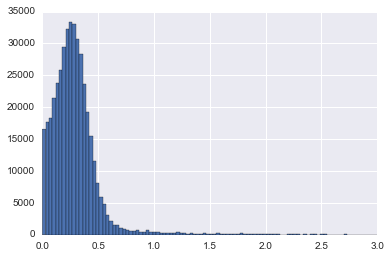

In [99]:
plt.hist((np.abs(y_test - reg_predictions3))/y_test, range = (0,3), bins = 100)

##### В общем качество стало лучше, но хороших предсказаний стало меньше по сравнению с линейными моделями 

In [100]:
# b = 0
mape_list1 = []
mape_list2 = []

for i in range(len(y_test)):
    a = (np.abs(y_test[i] - reg_predictions3[i]))/y_test[i]
    
    if a > 1:
        mape_list1.append(a)
        print i, a, y_test[i] , reg_predictions3[i]
    else:
        mape_list2.append(a)


1 1.1840493867 17000.0 37128.8395739
4 1.55273359443 40000.0 102109.343777
22 1.05333054448 35000.0 71866.5690568
117 1.22354909792 15000.0 33353.2364689
176 1.22589461071 50000.0 111294.730535
181 3.30467528494 30000.0 129140.258548
192 1.56706643452 49999.0 128350.754659
200 1.28912285705 50000.0 114456.142852
268 1.79546284551 25000.0 69886.5711377
287 1.70608537186 340000.0 920069.026431
311 1.41867992045 75000.0 181400.994034
333 2.27793141811 75000.0 245844.856358
349 1.42444020252 35000.0 84855.4070882
376 1.50413335701 115000.0 287975.336057
403 2.76969383813 25000.0 94242.3459533
436 1.82084310133 25000.0 70521.0775332
477 2.7221121572 15000.0 55831.682358
524 4.48053359054 20000.0 109610.671811
594 6.10169958316 15000.0 106525.493747
712 1.15340722206 18000.0 38761.3299972
841 1.22354909792 15000.0 33353.2364689
950 4.2665912025 17000.0 89532.0504425
979 2.84627294566 30000.0 115388.18837
1088 1.591926841 25000.0 64798.171025
1135 1.54464040204 30000.0 76339.2120612
1221 1.47

In [102]:
len(mape_list1)

9556

(array([  5156.,   5745.,   5676.,   5890.,   5895.,   5874.,   5692.,
          6209.,   6440.,   6191.,   7228.,   7996.,   7328.,   8189.,
          8272.,   7939.,   9013.,   8853.,   9593.,  10031.,   9810.,
         10279.,  11176.,  10861.,  10867.,  11284.,  11238.,  10806.,
         11208.,  11115.,  10506.,  10586.,   9627.,   9984.,   9547.,
          8795.,   8270.,   7818.,   7500.,   6982.,   6464.,   5869.,
          5391.,   5180.,   4848.,   4073.,   4006.,   3492.,   3037.,
          2678.,   2479.,   2314.,   1923.,   1716.,   1481.,   1977.,
          1326.,   1090.,    961.,   1044.,    805.,    731.,    664.,
           602.,    540.,    464.,    765.,    379.,    439.,    361.,
           372.,    329.,    318.,    263.,    379.,    228.,    383.,
           207.,    198.,    186.,    199.,    178.,    176.,    262.,
           167.,    246.,    301.,    178.,    152.,    140.,    157.,
           129.,    169.,    432.,    140.,    135.,    225.,    122.,
      

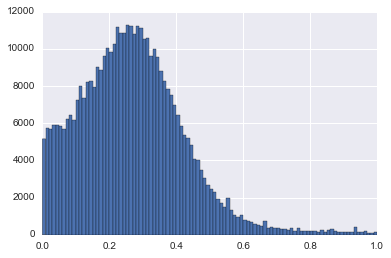

In [104]:
plt.hist(mape_list2, bins=100)

In [105]:
np.mean(mape_list2)

0.27009644969478913

In [106]:
np.median(mape_list2)

0.26006996860170184

### XGBoost

In [45]:
model = XGBRegressor()
model.fit(data, y)
print(model)
# make predictions for test data
reg_predictions6 = model.predict(data_test)

XGBRegressor(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, nthread=-1, objective='reg:linear', seed=0,
       silent=True, subsample=1)


##### Модель дает лучшее качество по сравнению с линейным и случайным лесом

In [46]:
mape(y_test, reg_predictions6)

40.398376804979854

##### Построим гистограмму

(array([ 39300.,  38154.,  36859.,  35210.,  31713.,  29986.,  25526.,
         22848.,  19325.,  16669.,  14753.,  11932.,  10313.,   8353.,
          7605.,   6176.,   5102.,   4583.,   4122.,   3819.,   2955.,
          2968.,   2746.,   2326.,   2158.,   1724.,   1919.,   1673.,
          1412.,   1569.,   1425.,   1344.,   1251.,   1102.,    920.,
          1042.,    921.,    976.,    795.,    775.,    743.,    756.,
           717.,    724.,    646.,    563.,    551.,    560.,    517.,
           472.,    452.,    386.,    401.,    392.,    457.,    494.,
           344.,    325.,    295.,    337.,    341.,    276.,    308.,
           246.,    218.,    249.,    194.,    246.,    199.,    184.,
           191.,    228.,    185.,    165.,    171.,    168.,    144.,
           196.,    135.,    167.,    134.,    142.,    133.,    157.,
           119.,    110.,    122.,    135.,    112.,    103.,    113.,
            87.,    108.,     90.,     89.,     78.,     91.,     88.,
      

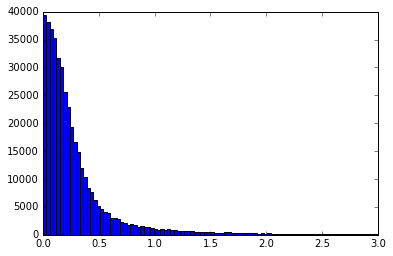

In [48]:
plt.hist((np.abs(y_test - reg_predictions6))/y_test, range = (0,3), bins = 100)

##### Мы получили модель с лучшим качеством и при этом хороших предсказаний также стало больше

In [50]:
mape_list1 = []
mape_list2 = []

for i in range(len(y_test)):
    a = (np.abs(y_test[i] - reg_predictions6[i]))/y_test[i]
    
    if a > 1:
        mape_list1.append(a)
        print i, a, y_test[i] , reg_predictions6[i]
    else:
        mape_list2.append(a)

4 1.30112091837 245000.0 563775.0
12 1.1022175 100000.0 210222.0
15 1.47499980469 80000.0 198000.0
67 6.916711875 50000.0 395836.0
110 2.02600044643 35000.0 105910.0
171 1.24416302083 45000.0 100987.0
173 1.89103611111 45000.0 130097.0
191 1.20999913194 18000.0 39780.0
209 1.07413328125 50000.0 103707.0
235 1.46886960227 55000.0 135788.0
245 1.12799326923 130000.0 276639.0
246 1.13139201389 90000.0 191825.0
273 2.62521610577 65000.0 235639.0
301 1.32763149038 65000.0 151296.0
311 1.72334134615 130000.0 354034.0
314 1.79752673969 97000.0 271360.0
320 1.08931578125 100000.0 208932.0
334 2.19661002604 48000.0 153437.0
341 1.45331796875 40000.0 98132.7
362 2.96634921875 20000.0 79327.0
376 5.2421015625 28000.0 174779.0
409 1.37832698864 55000.0 130808.0
436 2.4115134375 100000.0 341151.0
439 1.49171806066 34000.0 84718.4
441 1.11014453125 50000.0 105507.0
456 1.78917986919 43000.0 119935.0
473 1.07726074219 80000.0 166181.0
484 1.12406738281 40000.0 84962.7
503 1.28825104167 30000.0 68647.

(array([ 13279.,  13026.,  12993.,  12330.,  13073.,  12752.,  12536.,
         11994.,  12326.,  11616.,  12076.,  11520.,  10305.,  10993.,
         10412.,  10422.,   9726.,   9831.,   8688.,   8623.,   8224.,
          7846.,   7924.,   7072.,   6904.,   6152.,   6268.,   6155.,
          5502.,   5020.,   5413.,   4389.,   4949.,   4277.,   4229.,
          3422.,   3798.,   3192.,   3330.,   3152.,   2773.,   2427.,
          2569.,   2634.,   2402.,   2133.,   2018.,   2023.,   1804.,
          1688.,   1613.,   1649.,   1447.,   1484.,   1623.,   1357.,
          1146.,   1203.,   1265.,   1351.,   1057.,    938.,    959.,
           957.,    962.,   1047.,   1070.,    899.,    777.,    852.,
           768.,    707.,    687.,    870.,    603.,    610.,    597.,
           515.,    667.,    648.,    605.,    557.,    670.,    446.,
           450.,    456.,    507.,    469.,    485.,    614.,    491.,
           514.,    421.,    498.,    320.,    526.,    415.,    359.,
      

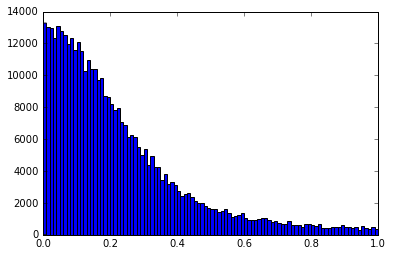

In [51]:
plt.hist(mape_list2, bins=100)

In [52]:
len(mape_list2)

398155

In [53]:
np.mean(mape_list2)

0.22382085271060967

In [54]:
np.median(mape_list2)

0.167849

### XGBoost tuning

##### В идеале для подбора гиперпараметров нужно использовать GridSearchCV - жадный перебор по параметрам с кросс-валидацией, но памяти не хватает. 

In [72]:
param_test1 = {
#  'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBRegressor( learning_rate=0.1, n_estimators=400, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,seed=27), 
 param_grid = param_test1, n_jobs=-1,iid=False, cv=3)
gsearch1.fit(data, y)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

IOError: [Errno 28] No space left on device

##### XGBoost имеет много параметров, я буду тюнить только "n_estimators", "max_depth" и "min_child_weight"

In [60]:
estimators = [100, 200, 300, 350, 400]
reg_predictions = []
for i, est in enumerate(estimators):
    model = XGBRegressor(n_estimators = est)
    model.fit(data, y)
    print(model)
    # make predictions for test data
    reg_predictions.append(model.predict(data_test))
    print mape(y_test, reg_predictions[i])

XGBRegressor(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, nthread=-1, objective='reg:linear', seed=0,
       silent=True, subsample=1)
39.3789238891
XGBRegressor(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=200, nthread=-1, objective='reg:linear', seed=0,
       silent=True, subsample=1)
36.3610046456
XGBRegressor(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=300, nthread=-1, objective='reg:linear', seed=0,
       silent=True, subsample=1)
34.9783641233
XGBRegressor(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=350, nthread=-1, objective='reg:line

(array([ 39520.,  38493.,  36683.,  34773.,  31227.,  28119.,  25641.,
         21945.,  19390.,  16676.,  14266.,  12540.,  10869.,   8928.,
          8021.,   7022.,   5822.,   5196.,   4468.,   4073.,   3551.,
          3223.,   2801.,   2550.,   2166.,   2019.,   1774.,   1725.,
          1469.,   1374.,   1273.,   1322.,   1125.,   1118.,    949.,
           989.,    823.,    919.,    746.,    749.,    778.,    669.,
           738.,    580.,    557.,    589.,    551.,    546.,    510.,
           457.,    451.,    423.,    385.,    462.,    356.,    409.,
           321.,    355.,    357.,    307.,    329.,    300.,    264.,
           249.,    235.,    249.,    217.,    242.,    237.,    212.,
           184.,    203.,    200.,    220.,    159.,    203.,    142.,
           167.,    157.,    126.,    125.,    148.,    156.,    102.,
           123.,    114.,    101.,    108.,    134.,    113.,     96.,
           118.,    108.,    108.,     89.,     84.,     86.,     66.,
      

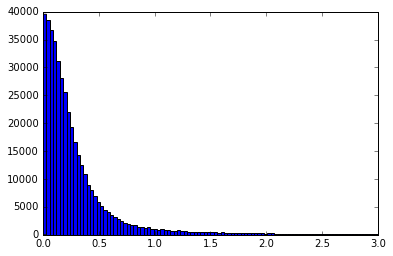

In [61]:
plt.hist((np.abs(y_test - reg_predictions[4]))/y_test, range = (0,3), bins = 100)

In [62]:
a = (np.abs(y_test - reg_predictions[4]))/y_test 
np.mean(a[a<1])

0.22759789918652787

In [92]:
np.mean(a)

0.3506051176831766

In [63]:
np.median(a[a<1])

0.17082416666666667

##### При увеличении n_estimators качество улучшается, попробуем еще увеличить 

In [73]:
estimators = [ 430, 450, 500]
reg_predictions2 = []
for i, est in enumerate(estimators):
    model2 = XGBRegressor(n_estimators = est)
    model2.fit(data, y)
    print(model2)
    # make predictions for test data
    reg_predictions2.append(model2.predict(data_test))
    print mape(y_test, reg_predictions2[i])

XGBRegressor(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=430, nthread=-1, objective='reg:linear', seed=0,
       silent=True, subsample=1)
33.9322935913
XGBRegressor(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=450, nthread=-1, objective='reg:linear', seed=0,
       silent=True, subsample=1)
33.7168528045
XGBRegressor(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=500, nthread=-1, objective='reg:linear', seed=0,
       silent=True, subsample=1)
33.2637088575


In [74]:
estimators = [ 530, 550, 580, 600]
reg_predictions3 = []
for i, est in enumerate(estimators):
    model3 = XGBRegressor(n_estimators = est)
    model3.fit(data, y)
    print(model3)
    # make predictions for test data
    reg_predictions3.append(model3.predict(data_test))
    print mape(y_test, reg_predictions3[i])

XGBRegressor(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=530, nthread=-1, objective='reg:linear', seed=0,
       silent=True, subsample=1)
33.1637445121
XGBRegressor(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=550, nthread=-1, objective='reg:linear', seed=0,
       silent=True, subsample=1)
32.9286150697
XGBRegressor(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=580, nthread=-1, objective='reg:linear', seed=0,
       silent=True, subsample=1)
32.5687841984
XGBRegressor(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=600, nthread=-1, objective='reg:line

In [75]:
estimators = [ 630, 650, 680, 700]
reg_predictions4 = []
for i, est in enumerate(estimators):
    model4 = XGBRegressor(n_estimators = est)
    model4.fit(data, y)
    print(model4)
    # make predictions for test data
    reg_predictions4.append(model4.predict(data_test))
    print mape(y_test, reg_predictions4[i])

XGBRegressor(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=630, nthread=-1, objective='reg:linear', seed=0,
       silent=True, subsample=1)
32.3874732074
XGBRegressor(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=650, nthread=-1, objective='reg:linear', seed=0,
       silent=True, subsample=1)
32.278304689
XGBRegressor(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=680, nthread=-1, objective='reg:linear', seed=0,
       silent=True, subsample=1)
32.1246576867
XGBRegressor(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=700, nthread=-1, objective='reg:linea

##### Построим гистограмму

(array([ 43165.,  41945.,  39097.,  36424.,  32737.,  28857.,  24967.,
         21487.,  18591.,  15818.,  13589.,  11485.,   9821.,   8249.,
          7316.,   6208.,   5522.,   4691.,   4236.,   3759.,   3246.,
          2877.,   2532.,   2250.,   2075.,   1873.,   1694.,   1563.,
          1469.,   1342.,   1238.,   1084.,   1096.,    932.,    924.,
           864.,    785.,    800.,    667.,    737.,    692.,    650.,
           623.,    587.,    527.,    532.,    513.,    449.,    461.,
           429.,    374.,    408.,    387.,    347.,    358.,    352.,
           336.,    270.,    299.,    302.,    323.,    285.,    271.,
           228.,    239.,    220.,    228.,    244.,    235.,    177.,
           162.,    186.,    172.,    160.,    147.,    143.,    140.,
           146.,    155.,    117.,    135.,    119.,    120.,    134.,
            95.,    118.,    117.,    108.,    116.,     87.,     87.,
            85.,     63.,     94.,     74.,     81.,     79.,     59.,
      

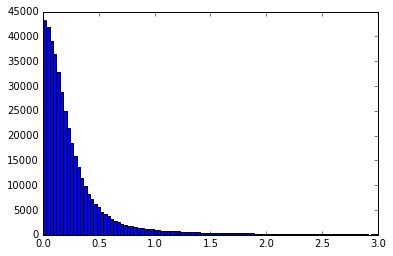

In [76]:
plt.hist((np.abs(y_test - reg_predictions4[3]))/y_test, range = (0,3), bins = 100)

In [78]:
a = (np.abs(y_test - reg_predictions4[3]))/y_test 
np.mean(a[a<1])

0.2164668572599791

In [79]:
np.median(a[a<1])

0.15782728149100256

In [81]:
np.percentile(a, 50)

0.17019565504807693

##### При n_estimators = 700  качество очень хорошее. Применим модель при разных значениях max_depth

In [83]:
depths = [ 2,4,6]
reg_predictions5 = []
for i, depth in enumerate(depths):
    model5 = XGBRegressor(n_estimators=700 ,max_depth = depth)
    model5.fit(data, y)
    print(model5)
    # make predictions for test data
    reg_predictions5.append(model5.predict(data_test))
    print mape(y_test, reg_predictions5[i])

XGBRegressor(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=2, min_child_weight=1, missing=None,
       n_estimators=700, nthread=-1, objective='reg:linear', seed=0,
       silent=True, subsample=1)
35.7907911094
XGBRegressor(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=700, nthread=-1, objective='reg:linear', seed=0,
       silent=True, subsample=1)
29.9999423395
XGBRegressor(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
       n_estimators=700, nthread=-1, objective='reg:linear', seed=0,
       silent=True, subsample=1)
27.2063135877


In [84]:
depths = [ 8,10]
reg_predictions6 = []
for i, depth in enumerate(depths):
    model6 = XGBRegressor(n_estimators=700 ,max_depth = depth)
    model6.fit(data, y)
    print(model6)
    # make predictions for test data
    reg_predictions6.append(model6.predict(data_test))
    print mape(y_test, reg_predictions6[i])

XGBRegressor(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=8, min_child_weight=1, missing=None,
       n_estimators=700, nthread=-1, objective='reg:linear', seed=0,
       silent=True, subsample=1)
25.2990652799
XGBRegressor(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=10, min_child_weight=1, missing=None,
       n_estimators=700, nthread=-1, objective='reg:linear', seed=0,
       silent=True, subsample=1)
24.0624443493


(array([  6.16720000e+04,   5.76840000e+04,   5.09800000e+04,
          4.25210000e+04,   3.47100000e+04,   2.77500000e+04,
          2.22210000e+04,   1.77900000e+04,   1.43550000e+04,
          1.18950000e+04,   9.80000000e+03,   8.19200000e+03,
          6.67900000e+03,   5.86000000e+03,   4.76300000e+03,
          4.15800000e+03,   3.53800000e+03,   3.11700000e+03,
          2.70400000e+03,   2.28000000e+03,   2.07600000e+03,
          1.76100000e+03,   1.68900000e+03,   1.58500000e+03,
          1.49500000e+03,   1.33000000e+03,   1.17500000e+03,
          1.16300000e+03,   1.08100000e+03,   1.00700000e+03,
          9.72000000e+02,   8.91000000e+02,   8.26000000e+02,
          7.35000000e+02,   6.88000000e+02,   7.12000000e+02,
          6.54000000e+02,   5.24000000e+02,   5.50000000e+02,
          4.87000000e+02,   5.10000000e+02,   4.98000000e+02,
          4.51000000e+02,   4.45000000e+02,   3.68000000e+02,
          4.15000000e+02,   3.87000000e+02,   3.44000000e+02,
        

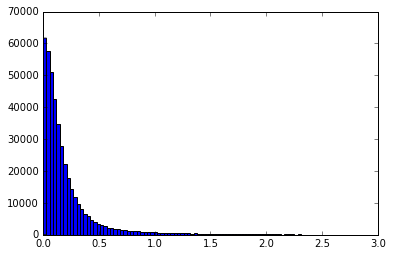

In [85]:
plt.hist((np.abs(y_test - reg_predictions6[1]))/y_test, range = (0,3), bins = 100)

In [86]:
a = (np.abs(y_test - reg_predictions6[1]))/y_test 
np.mean(a[a<1])

0.1721633020831911

In [87]:
np.median(a[a<1])

0.11396184210526315

In [89]:
np.percentile(a, 75)

0.24828393568364845

##### При max_depth = 10 мы сильно увеличил качество модели, до 24%

##### Запустим модель при разных min_child_weights

In [90]:
min_child_weights = [ 2, 4, 6, 8]
reg_predictions7 = []
for i, child in enumerate(min_child_weights):
    model7 = XGBRegressor(n_estimators=700 ,max_depth = 10, min_child_weight=child)
    model7.fit(data, y)
    print(model7)
    # make predictions for test data
    reg_predictions7.append(model7.predict(data_test))
    print mape(y_test, reg_predictions7[i])

XGBRegressor(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=10, min_child_weight=2, missing=None,
       n_estimators=700, nthread=-1, objective='reg:linear', seed=0,
       silent=True, subsample=1)
24.035297909
XGBRegressor(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=10, min_child_weight=4, missing=None,
       n_estimators=700, nthread=-1, objective='reg:linear', seed=0,
       silent=True, subsample=1)
23.9174577541
XGBRegressor(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=10, min_child_weight=6, missing=None,
       n_estimators=700, nthread=-1, objective='reg:linear', seed=0,
       silent=True, subsample=1)
23.9253521734
XGBRegressor(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=10, min_child_weight=8, missing=None,
       n_estimators=700, nthread=-1, objective='reg:l

##### Модель показывает лучшее качество при min_child_weights = 4

##### Построим гистограмму

(array([  6.17570000e+04,   5.81430000e+04,   5.11020000e+04,
          4.27600000e+04,   3.48910000e+04,   2.75150000e+04,
          2.20790000e+04,   1.76580000e+04,   1.44040000e+04,
          1.19880000e+04,   9.69500000e+03,   8.15700000e+03,
          6.65900000e+03,   5.61900000e+03,   4.80200000e+03,
          4.08100000e+03,   3.52400000e+03,   3.03600000e+03,
          2.76700000e+03,   2.28700000e+03,   2.03500000e+03,
          1.87400000e+03,   1.67100000e+03,   1.57400000e+03,
          1.38100000e+03,   1.29900000e+03,   1.21200000e+03,
          1.14800000e+03,   1.10900000e+03,   1.03000000e+03,
          9.80000000e+02,   8.23000000e+02,   8.02000000e+02,
          7.29000000e+02,   7.48000000e+02,   6.56000000e+02,
          6.46000000e+02,   6.11000000e+02,   5.37000000e+02,
          5.18000000e+02,   4.96000000e+02,   4.68000000e+02,
          4.64000000e+02,   4.03000000e+02,   3.98000000e+02,
          3.67000000e+02,   3.72000000e+02,   3.40000000e+02,
        

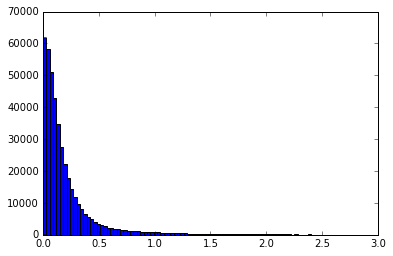

In [91]:
plt.hist((np.abs(y_test - reg_predictions7[1]))/y_test, range = (0,3), bins = 100)

##### Немного статистики

In [93]:
a = (np.abs(y_test - reg_predictions7[1]))/y_test 
# среднее при условии что разница между предсказанным значением и реальным значением не больше 100%
np.mean(a[a<1])

0.171591183385849

In [94]:
# медиана при условии что разница между предсказанным значением и реальным значением не больше 100%
np.median(a[a<1])

0.11349275568181819

##### Чуть больше 50% данных мы предсказываем с погрешностью 12%, а 75% данных с погрешностью 24.7%, что является неплохим результатом

In [129]:
# медиана
np.percentile(a, 50)

0.119425422754329

In [95]:
# 75 процентов данных 
np.percentile(a, 75)

0.24704743088942308

##### Запускаем финальную модель и делаем предсказание на финальных тестовых данных 

In [96]:
model_final = XGBRegressor(n_estimators=700, max_depth = 10, min_child_weight=4)
model_final.fit(data, y)
print(model_final)

XGBRegressor(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=10, min_child_weight=4, missing=None,
       n_estimators=700, nthread=-1, objective='reg:linear', seed=0,
       silent=True, subsample=1)


In [97]:
result = model_final.predict(data_test)

In [98]:
mape(y_test, result)

23.91745775413216

In [99]:
# make predictions for final test data
results_final = model_final.predict(X_final)

##### Рандомная проверка

In [176]:
results_final[205]

1291517.4

In [131]:
results_final

array([  964794.375 ,   345998.6875,   298167.625 , ...,   414226.8125,
         713399.5   ,  1137607.375 ], dtype=float32)

In [175]:
test.iloc[205:210]

startTime                 region       brand  \
205  2016-12-01 01:08:12.000000  Нижегородская область         BMW   
206  2016-12-01 01:09:09.000000                   Крым  ВАЗ (LADA)   
207  2016-12-01 01:09:21.000000    Вологодская область  ВАЗ (LADA)   
208  2016-12-01 01:09:29.000000               Удмуртия  ВАЗ (LADA)   
209  2016-12-01 01:09:34.000000      Тюменская область  ВАЗ (LADA)   

           model carcassType    color typeOfSteering  yearOfCar engineType  \
205           X5   Универсал  Зелёный          Левый       2007     Бензин   
206       Kalina       Седан    Синий          Левый       2006     Бензин   
207  2115 Samara       Седан    Синий          Левый       2001     Бензин   
208  2114 Samara     Хетчбэк   Чёрный          Левый       2006     Бензин   
209         2109     Хетчбэк   Чёрный          Левый       2002     Бензин   

     engineCapacity  mileage driveType transmissionType  power ownersCount  \
205             3.0   170000    Полный          Автомат    272           2   
206             1.6   150000  Передний         Механика     81          4+   
207             1.6   260000  Передний         Механика     76          4+   
208             1.6    90000  Передний         Механика     80           3   
209             1.5      999  Передний         Механика     75          4+   

     price  
205      0  
206      0  
207      0  
208      0  
209      0

In [138]:
test.head()

startTime               region     brand  model  \
0  2016-12-01 00:00:33.000000  Саратовская область  Infiniti    G35   
1  2016-12-01 00:00:36.000000               Москва     Skoda   Yeti   
2  2016-12-01 00:00:52.000000     Тульская область   Peugeot    408   
3  2016-12-01 00:00:52.000000     Тверская область    Daewoo  Nexia   
4  2016-12-01 00:00:56.000000               Москва   Citroen     C4   

   carcassType       color typeOfSteering  yearOfCar engineType  \
0        Седан     Бежевый          Левый       2008     Бензин   
1  Внедорожник  Серебряный          Левый       2014     Бензин   
2        Седан       Белый          Левый       2012     Бензин   
3        Седан  Серебряный          Левый       2012     Бензин   
4        Седан       Серый          Левый       2014     Бензин   

   engineCapacity  mileage driveType transmissionType  power ownersCount  \
0             3.5   145000    Полный          Автомат    316           3   
1             1.2    47630  Передний         Механика    102           1   
2             1.6    88000  Передний         Механика    113           1   
3             1.6    55766  Передний         Механика    109           1   
4             1.6    30591  Передний          Автомат    150           1   

   price  
0      0  
1      0  
2      0  
3      0  
4      0

##### В качестве диапазона цены я беру нижнюю границу 90% от стоимости цены авто, а верхнюю как 110% от стоимости авто. 

In [159]:
df = pd.DataFrame({'price': results_final.astype(int)})

In [160]:
df['id'] = range(0, len(df))

In [161]:
df = df[['id', 'price']]

In [162]:
df['PriceRangeLow'] = (0.9 * results_final).astype(int)

In [163]:
df['PriceRangeHigh'] = (1.1 * results_final).astype(int) 

In [164]:
df.tail()

id    price  PriceRangeLow  PriceRangeHigh
416018  416018   266929         240236          293621
416019  416019   103219          92897          113541
416020  416020   414226         372804          455649
416021  416021   713399         642059          784739
416022  416022  1137607        1023846         1251368

##### Запись данных в файл

In [169]:
df.to_csv('PricePrediction.csv', index=False)

In [170]:
df = pd.read_csv('PricePrediction.csv')
df.head()

id   price  PriceRangeLow  PriceRangeHigh
0   0  964794         868314         1061273
1   1  345998         311398          380598
2   2  298167         268350          327984
3   3  122308         110078          134539
4   4  356192         320573          391812